# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекc.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных:**

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов

- ceiling_height — высота потолков (м)

- cityCenters_nearest — расстояние до центра города (м)

- days_exposition — сколько дней было размещено объявление (от публикации до снятия)

- first_day_exposition — дата публикации

- floor — этаж

- floors_total — всего этажей в доме

- is_apartment — апартаменты (булев тип)

- kitchen_area — площадь кухни в квадратных метрах (м²)

- last_price — цена на момент снятия с публикации

- living_area — жилая площадь в квадратных метрах (м²)

- locality_name — название населённого пункта

- open_plan — свободная планировка (булев тип)

- parks_around3000 — число парков в радиусе 3 км

- parks_nearest — расстояние до ближайшего парка (м)

- ponds_around3000 — число водоёмов в радиусе 3 км

- ponds_nearest — расстояние до ближайшего водоёма (м)

- rooms — число комнат

- studio — квартира-студия (булев тип)

- total_area — площадь квартиры в квадратных метрах (м²)

- total_images — число фотографий квартиры в объявлении



**Цель исследования:**

1. Научиться определять рыночную стоимость объектов недвижимости. 
2. Установить параметры, которые позволят построить автоматизированную систему оценки недвижимости.

**Ход исследования:**

1. Изучение данных из файла
2. Предобработка данных
3. Расчёты и добавление результатов в таблицу
4. Исследовательский анализ данных
5. Общий вывод
6. Чек-лист готовности проекта

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!wget https://code.s3.yandex.net/datasets/real_estate_data.csv

--2023-02-28 08:02:35--  https://code.s3.yandex.net/datasets/real_estate_data.csv
Resolving code.s3.yandex.net (code.s3.yandex.net)... 93.158.134.158, 2a02:6b8::2:158
Connecting to code.s3.yandex.net (code.s3.yandex.net)|93.158.134.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3214802 (3.1M) [text/csv]
Saving to: ‘real_estate_data.csv’

real_estate_data.cs 100%[===================>]   3.07M  2.32MB/s    in 1.3s    

2023-02-28 08:02:38 (2.32 MB/s) - ‘real_estate_data.csv’ saved [3214802/3214802]



In [3]:
df = pd.read_csv('real_estate_data.csv', delimiter = '\t')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Переименуем столбцы с синтаксическими ошибками.

In [5]:
df.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest', 'parks_around3000' : 'parks_around_3000', 'ponds_around3000':'ponds_around_3000' }, inplace = True) 

In [6]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [7]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В качестве разделителя в документе csv используется '\t' вместо запятой, поэтому передали функции read_csv() эту информацию для корректного отображения данных. Изучили общую информацию о данных, посмотрели первые 10 строк таблицы и изучили статистические значения. Переименовали столбцы с синтаксическими ошибками.

### Вывод

1. Датасет состоит из 22 столбцов и 23699 строк.
2. В датасете присутствуют пропуски в столбцах: 

- ceiling_height 
- floors_total 
- living_area
- is_apartment
- kitchen_area 
- balcony
- locality_name
- airports_nearest 
- cityСenters_nearest
- parks_around_3000
- parks_nearest
- ponds_around_3000
- ponds_nearest
- days_exposition

3. Название столбцов cityCenters_nearest, parks_around3000, ponds_around3000 содержит синтаксические ошибки, исправили их сразу.
    

4. Типы данных столбцов необходимо будет изменить, поскольку неудобно будет работать с ними: 
 
- last_price - тип данных столбца - float, а должен быть int 
    
- first_day_exposition - тип данных столбца - object, а должен быть - datetime
    
- floors_total - тип данных столбца - float, а должен быть int (количество этажей - целое значение).
   
- is_apartment - тип данных столбца - object, а должен быть - bool (об этом говориться в условиях задачи)
    
- balcony -  тип данных столбца - float, а должен быть int 
    
- parks_around3000 - тип данных столбца - float, а должен быть int
    
- ponds_around3000 - тип данных столбца - float, а должен быть int
 
- days_exposition - тип данных столбца - float, а должен быть int
    
5. В датасете есть аномальные значения, например столбец ceiling_height содержит значения 1 м и 100 м, в столбце rooms минимальное значение равно 0. Также аномальные значения есть в столбцах last_price, total_area, kitchen_area, living_area, days_exposition.

## Предобработка данных

Прежде, чем начать предобработку данных, посмотрим на общее количество пропусков в датафрейме.

In [8]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Посчитаем долю пропущенных значений в столбцах с пропущенными значениями.


In [9]:
df.isna().sum() * 100 / len(df)

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around_3000       23.283683
parks_nearest           65.909954
ponds_around_3000       23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

В столбцах, где доля пропусков ниже 10% пропущенные значения не сильно повлияют на анализ данных. Большинство значений получены автоматически на основе картографических данных, заменять их другими значениями, а тем более медианой нет смысла. 

Пройдемся по всем столбцам с пропусками. Заполним пропуски там где это уместно, а также изменим тип данных, где это необходимо.

Изменим тип данных в столбце last_price на int для удобства.

In [10]:
df['last_price'] = df['last_price'].astype('int')

Посмотрим детальнее на столбец ceiling_height.


<AxesSubplot:ylabel='Frequency'>

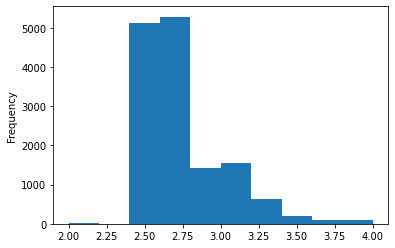

In [11]:
df['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 10, range=(2,4))

В столбце ceiling_height есть выбросы - необоснованно большие значения и сомнительно маленькие значения. Вряд ли, есть квартиры с потолками выше 4 метров.

In [12]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Медиана и среднее не сильно отличаются, возможно из-за выбросов.
Посчитаем квартиры, где потолок ниже 2 метров и выше 4 метров.

In [13]:
(df['ceiling_height'] > 4).sum()

75

Таких квартир 75! Посмотрим на 10 квартир с самыми высокими потолками.

In [14]:
(df['ceiling_height'] < 2).sum()

3

Всего 3 квартиры с потолками ниже 2 метров.

In [15]:
df[df['ceiling_height'] > 4].sort_values('ceiling_height').tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
21824,20,2450000,44.0,2019-02-12T00:00:00,2,27.0,2.0,38.0,2,False,...,8.6,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22938,14,4000000,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,...,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
4876,7,3000000,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
10773,8,3800000,58.0,2017-10-13T00:00:00,2,27.0,10.0,30.1,3,False,...,8.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0
20478,11,8000000,45.0,2017-07-18T00:00:00,1,27.0,4.0,22.0,2,NaN,...,10.0,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
17857,1,3900000,56.0,2017-12-22T00:00:00,3,27.0,5.0,33.0,4,False,...,NaN,NaN,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
21377,19,4900000,42.0,2017-04-18T00:00:00,1,27.5,24.0,37.7,19,False,...,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
22336,19,9999000,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22869,0,15000000,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


In [16]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [17]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [18]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Потолок 100 метров, а фотографии не сделали) Вернемся к потолкам в исследовательском анализе, поскольку сейчас для замены достаточно много выбросов. Заполнили пропуски медианой. Высота потолков не указана, скорее всего потому, что не отличается от обычной высоты потолка.

Доля пропусков в floors_total 0.36 %. Посмотрим на пропуски и оставим все как есть, поскольку никакой связи с этажами на первый взгляд не видно.

In [19]:
df[df['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [20]:
df[df['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,64900000,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000,32.80,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000,40.00,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000,35.00,2017-12-08T00:00:00,1,2.65,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


В столбце living_area много знаков после запятой, для удобства округлим. Нам с ними ещё работать. Заменить пропуски можно, но это проблематично, поскольку заполнить медианой или средним значением будет ошибочно. Нужно сопоставить несколько параметров и рассчитать соответствующую жилую площадь.

In [21]:
df ['living_area'] = round(df['living_area'])

In [22]:
df['living_area'].value_counts()

18.0     1805
17.0     1251
30.0     1147
16.0     1081
28.0      890
         ... 
156.0       1
222.0       1
348.0       1
322.0       1
274.0       1
Name: living_area, Length: 211, dtype: int64

In [23]:
round(df['living_area'].describe())

count    21796.0
mean        34.0
std         22.0
min          2.0
25%         19.0
50%         30.0
75%         42.0
max        410.0
Name: living_area, dtype: float64

Пропуски в столбце is_apartment скорее всего означают, что эта недвижимость не относиться к апартаментам. Поэтому пропуски так и заполним. Переведем тип данных в bool.



In [24]:
df['is_apartment'] = df['is_apartment'].fillna(False).astype('bool')

Пропуски в balcony заменим на 0. Во-первых, это самое частое значение, а во-вторых кто не укажет балкон при продаже? Это же как вишенка на торте. А также заменим тип данных на int.

In [25]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [26]:
df['balcony'] = df['balcony'].fillna(0).astype('int')

In [27]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Количество дней продажи достаточно важный параметр. В столбце days_exposition пропусков 3181, поскольку эти данные рассчитываются автоматически, может отсутствовать дата закрытия объявления, т.е. продажа еще не завершена. По этой же причине могут быть и продажи со сроком больше 4 лет. Например, самая длительная продажа - 1580 дней. 
    
Пропуски можно заменить 1, и считать, что эти объявления еще активны. Также заменим тип данных на int. 
    
Посмотрим для уточнения достоверности выводов квартиры со сроком продажи более 3-х лет (1095 дней).

In [28]:
df[df['days_exposition'] >= 1095]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
353,4,5990000,43.5,2015-05-08T00:00:00,1,3.00,5.0,25.0,4,False,...,9.40,0,Санкт-Петербург,10527.0,10278.0,1.0,93.0,0.0,NaN,1292.0
398,7,12789000,79.3,2014-12-09T00:00:00,2,3.00,8.0,43.0,5,False,...,17.60,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,1345.0
437,12,3350000,37.0,2015-02-24T00:00:00,1,2.55,6.0,18.0,6,False,...,8.40,0,Петергоф,46151.0,34044.0,1.0,185.0,1.0,755.0,1273.0
459,13,5200000,51.0,2016-03-02T00:00:00,2,2.55,9.0,32.0,5,False,...,6.00,0,Санкт-Петербург,48522.0,16360.0,0.0,NaN,0.0,NaN,1153.0
512,8,6260000,43.3,2014-12-09T00:00:00,1,2.65,8.0,NaN,5,False,...,NaN,0,Санкт-Петербург,39946.0,10720.0,1.0,2102.0,3.0,303.0,1155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23055,8,3200000,33.0,2016-03-18T00:00:00,1,2.65,24.0,13.0,3,False,...,9.75,0,посёлок Шушары,13461.0,19247.0,0.0,NaN,1.0,351.0,1130.0
23212,9,7515162,58.8,2015-03-10T00:00:00,2,2.65,10.0,30.0,3,False,...,11.10,0,Санкт-Петербург,23604.0,5294.0,0.0,NaN,1.0,434.0,1239.0
23248,5,4900000,80.0,2014-12-25T00:00:00,3,2.65,15.0,47.0,14,False,...,9.00,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,1187.0
23318,6,5620020,82.3,2015-03-10T00:00:00,3,2.70,21.0,46.0,12,False,...,15.70,0,Санкт-Петербург,21793.0,17121.0,0.0,NaN,1.0,31.0,1200.0


Таких предложений 170. Есть квартиры с характеристиками востребованными на рынке недвижимости, но они еще не проданы. Возможно эти объявления просто не закрыты.



In [29]:
df.loc[df['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000,40.00,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,False,...,NaN,1,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.0,7,False,...,7.00,0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000,52.10,2019-01-31T00:00:00,2,2.60,24.0,30.0,9,False,...,8.30,2,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.0,17,False,...,15.60,0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.0,5,False,...,5.60,1,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.0,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000,56.70,2018-02-11T00:00:00,2,2.65,3.0,30.0,1,False,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

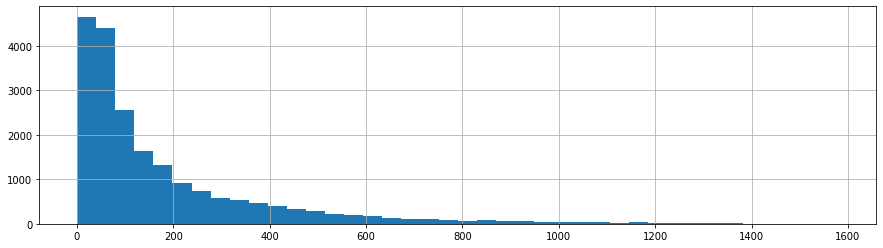

In [30]:
df['days_exposition'].hist(bins=40, figsize=(15,4))

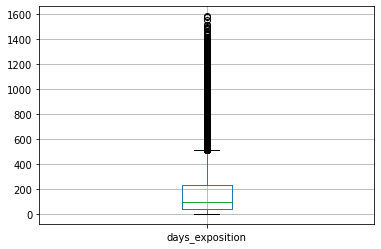

In [31]:
df.boxplot(column='days_exposition')
plt.show()

In [32]:
df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')

In [33]:
df['days_exposition'].isna().sum()

0

<AxesSubplot:>

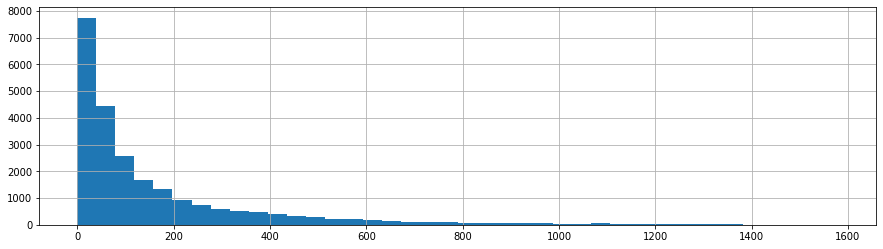

In [34]:
df['days_exposition'].hist(bins=40, figsize=(15,4))

Замена пропусков и типа данных произведена. 

Столбец first_day_exposition переведем в формат datetime64.

In [35]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

<AxesSubplot:>

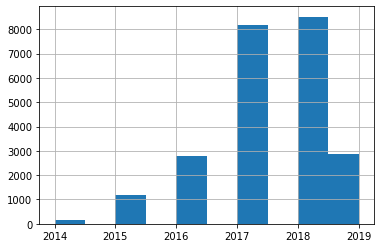

In [36]:
df['first_day_exposition'].dt.year.hist()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [38]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition             0
dtype: int64

### Вывод

Изучены пропущенные значения, предложена и произведена логичная замена. Данные приведены к нужным типам, для удобства проведения дальнейших операций с этими столбцами. Большинство пропусков появились по технической причине (например, импорт картографических данных), также есть ошибки во вводе данных (например, высота потолка 100 м или количество комнат - 0).

## Расчёты и добавление результатов в таблицу

Посчитаем цену квадратного метра и добавим результат в таблицу.

In [39]:
df['price_square_meter'] = df['last_price'] / df['total_area']

In [40]:
df['price_square_meter'].head()

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: price_square_meter, dtype: float64

Создадим столбцы с днем недели, месяцем и годом публикации объявления, результат добавим в таблицу.

In [41]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

In [42]:
df['weekday_exposition'].head()

0    3
1    1
2    3
3    4
4    1
Name: weekday_exposition, dtype: int64

In [43]:
df['month_exposition'] = df['first_day_exposition'].dt.month

In [44]:
df['month_exposition'].head()

0     3
1    12
2     8
3     7
4     6
Name: month_exposition, dtype: int64

In [45]:
df['year_exposition'] = df['first_day_exposition'].dt.year

In [46]:
df['year_exposition'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year_exposition, dtype: int64

Добавим в таблицу этаж квартиры с 3 вариантами — первый, последний и другой. Для этого напишем функцию.

In [47]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
df['floor_category'] = df.apply(floor_category, axis = 1)

In [48]:
df['floor_category'].head()

0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_category, dtype: object

Посчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей. Результат добавим в таблицу.

In [49]:
df['living_area_ratio'] = df['living_area'] / df['total_area']

In [50]:
df['living_area_ratio'].head()

0    0.472222
1    0.470297
2    0.607143
3         NaN
4    0.320000
Name: living_area_ratio, dtype: float64

In [51]:
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

In [52]:
df['kitchen_area_ratio'].head()

0    0.231481
1    0.272277
2    0.148214
3         NaN
4    0.410000
Name: kitchen_area_ratio, dtype: float64

Посмотрим на таблицу с новыми столбцами.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [54]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,0,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,19.0,1,False,...,0.0,NaN,81,82920.792079,1,12,2018,первый,0.470297,0.272277
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.0,4,False,...,2.0,574.0,558,92785.714286,3,8,2015,другой,0.607143,0.148214
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,3.0,234.0,424,408176.100629,4,7,2015,другой,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.0,5,False,...,NaN,NaN,55,95065.789474,0,9,2018,другой,0.460526,0.299342
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,11.0,6,False,...,0.0,NaN,155,99195.710456,3,11,2017,другой,0.294906,0.386059
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,...,0.0,NaN,0,110544.692737,3,4,2019,другой,NaN,0.263966
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.0,26,False,...,NaN,NaN,189,87454.764777,2,5,2018,другой,0.452352,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,44.0,7,False,...,0.0,NaN,289,88524.590164,6,2,2017,другой,0.721311,0.106557


### Вывод

Посчитаны и добавлены в таблицу:

- цена квадратного метра;
    
- день недели, месяц и год публикации объявления;
    
- этаж квартиры; варианты — первый, последний, другой;
    
- соотношение жилой и общей площади, а также отношение площади кухни к общей. 
    
    
Можно приступать к исследовательскому анализу данных.

## Исследовательский анализ данных

Изучим площадь, цену, число комнат и высоту потолков. Построим гистограммы для каждого параметра.

<AxesSubplot:>

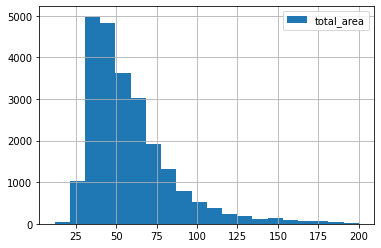

In [55]:
df['total_area'].hist(bins=20, range=(12, 200), legend=True)

In [56]:
df['total_area'].value_counts()

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
184.40      1
55.64       1
56.16       1
109.10      1
76.75       1
Name: total_area, Length: 2182, dtype: int64

In [57]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Распределение данных нормальное. Выбросы есть, но они не сильно влияют на общее представление о данных. И в данном случае эти выбросы скорее всего реальные данные, хоть и отличаются от среднестатистической площади квартиры. Минимальная площадь - 12 кв.м., максимальная - 900 кв.м. Среднее значение равно 60, медиана - 52.

In [58]:
df['last_price'] = df['last_price']/1000

<AxesSubplot:>

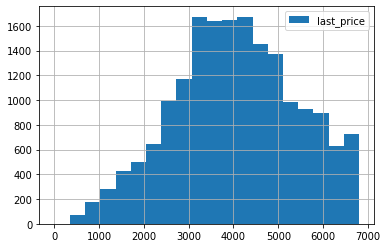

In [59]:
df['last_price'].hist(bins=20, range=(12, 6800), legend=True)

In [60]:
df['last_price'].value_counts()

4500.0     342
3500.0     291
4300.0     260
4000.0     260
4200.0     259
          ... 
12890.0      1
29375.0      1
7545.6       1
5205.0       1
11475.0      1
Name: last_price, Length: 2978, dtype: int64

In [61]:
df['last_price'].describe().round()

count     23699.0
mean       6542.0
std       10887.0
min          12.0
25%        3400.0
50%        4650.0
75%        6800.0
max      763000.0
Name: last_price, dtype: float64

In [62]:
df['last_price'].max()

763000.0

Распределение данных нормальное. Минимальная стоимость квартиры - 12.0 тыс. рублей (скорее всего это ошибка записи, указали в тыс.руб.), максимальная - 763000.0 тыс. рублей . Среднее значение равно 6542.0, медиана - 4650.0.

In [63]:
df['rooms'] = df['rooms'].astype('int')

In [64]:
df['rooms'].describe().round()

count    23699.0
mean         2.0
std          1.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         19.0
Name: rooms, dtype: float64

Text(0.5, 1.0, 'Комнаты')

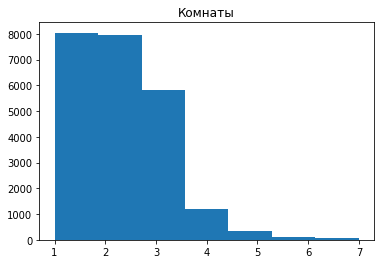

In [65]:
plt.hist(df['rooms'], bins=7,range=(1,7))
plt.title('Комнаты')

Перевела столбец к типу int и изменила визуализацию гистограммы.

In [66]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

In [67]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [68]:
df[df['rooms'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio
144,1,2450.0,27.00,2017-03-30,0,2.65,24.0,16.0,2,False,...,NaN,NaN,181,90740.740741,3,3,2017,другой,0.592593,NaN
349,4,2320.0,25.00,2017-09-27,0,2.65,14.0,17.0,1,False,...,NaN,NaN,45,92800.000000,2,9,2017,первый,0.680000,NaN
440,8,2480.0,27.11,2018-03-12,0,2.65,17.0,25.0,4,False,...,2.0,982.0,64,91479.158982,0,3,2018,другой,0.922169,NaN
508,0,3375.0,34.40,2017-03-28,0,2.65,26.0,24.0,19,False,...,1.0,593.0,430,98110.465116,1,3,2017,другой,0.697674,NaN
608,2,1850.0,25.00,2019-02-20,0,2.65,10.0,NaN,7,False,...,NaN,NaN,29,74000.000000,2,2,2019,другой,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200.0,26.00,2017-09-01,0,2.65,25.0,18.0,16,False,...,1.0,623.0,14,123076.923077,4,9,2017,другой,0.692308,NaN
23442,0,2500.0,27.70,2017-09-28,0,2.65,24.0,18.0,4,False,...,NaN,NaN,4,90252.707581,3,9,2017,другой,0.649819,NaN
23554,15,3350.0,26.00,2018-09-07,0,2.65,19.0,NaN,8,False,...,2.0,112.0,31,128846.153846,4,9,2018,другой,NaN,NaN
23592,10,1450.0,29.00,2017-11-11,0,2.65,9.0,18.0,8,False,...,NaN,NaN,82,50000.000000,5,11,2017,другой,0.620690,NaN


In [69]:
df.query('rooms == 0')[['kitchen_area', 'living_area']].isna().sum()

kitchen_area    197
living_area      14
dtype: int64

Скорее всего 0 комнат указано в студиях, поскольку не указана. Лишь малая часть пропусков по этим столбцам относится к студиям. Да и с ними нам нечего делать - не делить же пополам общую площадь. Оставляем как есть.

Распределение нормальное, но есть нулевые значения. Таких значений не много, но удалять их не будем. Среднее значение равно 2, медиана равна 2. Максимальное значение - 19. Больше всего в продаже 1 и 2-х комнатных квартир!

<AxesSubplot:>

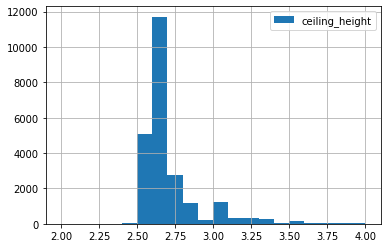

In [70]:
df['ceiling_height'].hist(bins=20, range=(2, 4), legend=True)

In [71]:
df['ceiling_height'].value_counts()

2.65    9871
2.50    3515
2.60    1646
2.70    1574
3.00    1112
        ... 
5.00       1
2.20       1
4.15       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64

In [72]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Распределение нормальное, но есть выборосы, такие как 1 и 100. Большинство квартир имеют высоту потолков от 2,5 до 2,7 метров. Оставим все как есть.

Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Не будем брать во внимание значения с 0.

<AxesSubplot:>

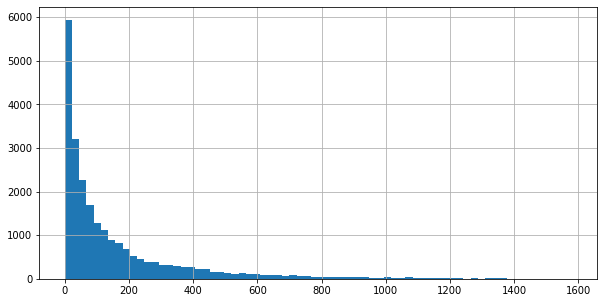

In [73]:
df['days_exposition'].hist(bins = 70, figsize = (10,5))

<AxesSubplot:ylabel='Frequency'>

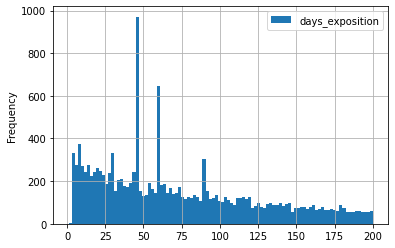

In [74]:
df.plot(kind = 'hist', y = 'days_exposition', bins = 100, grid=True, legend = True, range = (1,200))

<AxesSubplot:>

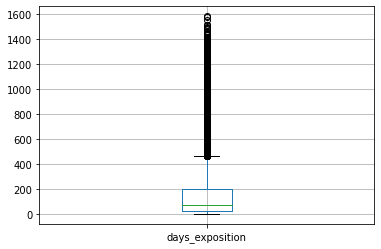

In [75]:
df.boxplot(column = 'days_exposition')

In [76]:
df['days_exposition'].describe()

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [77]:
df['days_exposition'].value_counts()

0       3181
45       880
60       538
7        234
30       208
        ... 
1021       1
1362       1
1105       1
795        1
971        1
Name: days_exposition, Length: 1142, dtype: int64

На первый взгляд можно сказать, что продажа занимает от 22 до 156 дней. Самая долгая продажа - 1580 дней.
Продажу в срок до 74 дней можно считать быстрой, а продажу дольше 199 дней можно считать необычно долгой. 
    
Но, огромное количество одинаковых данных по дням продаж наталкивает на мысль, что это сроки размещения объявлений на платформе Яндекс.Недвижимость. Значит уберем все выбивающиеся значения. Основная чать продаж в сроки до 199 дней, поэтому посмотрим тщательнее на этот промежуток.

<AxesSubplot:>

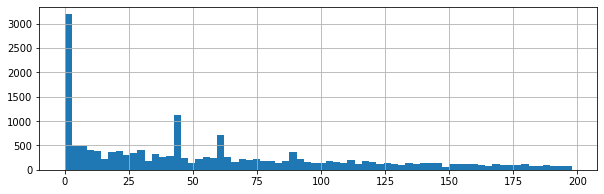

In [78]:
df.query('days_exposition<199')['days_exposition'].hist(bins=70, figsize=(10,3))

<AxesSubplot:>

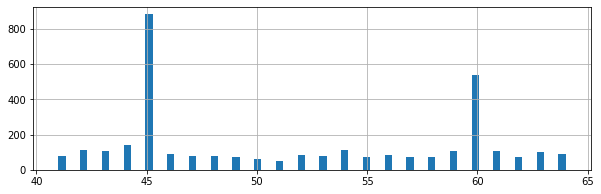

In [79]:
df.query('40<days_exposition<65')['days_exposition'].hist(bins=70, figsize=(10,3))

Уберем значения 45 и 60. Значения от 0 до 1 - это активные объявления, их не будет удалять.

In [80]:
bad_values = [45,60]
df_good = df.query('days_exposition not in @bad_values')

In [81]:
df_good['days_exposition'].describe()

count    22281.000000
mean       163.349625
std        218.498946
min          0.000000
25%         20.000000
50%         84.000000
75%        212.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

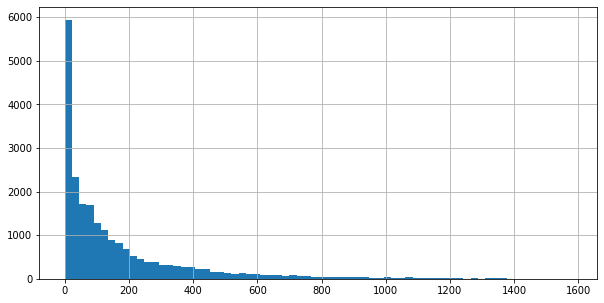

In [82]:
df_good['days_exposition'].hist(bins = 70, figsize = (10,5))

<AxesSubplot:>

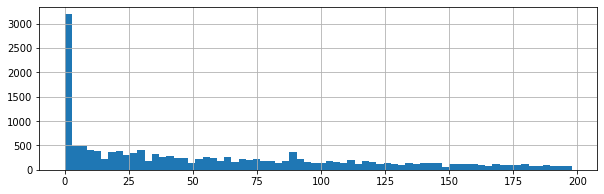

In [83]:
df_good.query('days_exposition<199')['days_exposition'].hist(bins=70, figsize=(10,3))

In [84]:
df_good['days_exposition'].describe()

count    22281.000000
mean       163.349625
std        218.498946
min          0.000000
25%         20.000000
50%         84.000000
75%        212.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем продажа занимает 163 дня, родажа занимает от 112 до 193 дней. Продажу в срок до 20 дней можно считать быстрой, а продажу дольше 212 дней можно считать необычно долгой.

Уберем выбивающиеся значения по числу комнат.

In [85]:
df_good['rooms'].value_counts()

1     7491
2     7423
3     5527
4     1141
5      323
0      182
6      104
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

<AxesSubplot:>

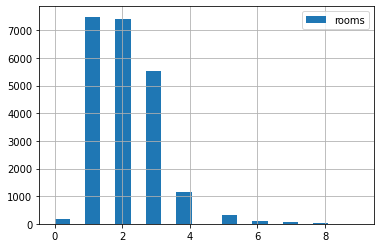

In [86]:
df_good['rooms'].hist(bins=20, range=(0, 9), legend=True)

In [87]:
bad_rooms = [10, 11, 14, 19, 16, 12, 15]
df_good = df_good.query('rooms not in @bad_rooms')
df_good['rooms'].describe()

count    22270.000000
mean         2.079120
std          1.060405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

In [88]:
df_good['total_area'].value_counts()

45.00     389
42.00     355
31.00     324
60.00     320
44.00     314
         ... 
52.26       1
494.10      1
127.80      1
31.42       1
76.75       1
Name: total_area, Length: 2126, dtype: int64

In [89]:
df_good['total_area'].describe()

count    22270.000000
mean        60.780534
std         35.580982
min         12.000000
25%         40.000000
50%         52.100000
75%         70.000000
max        631.200000
Name: total_area, dtype: float64

In [90]:
df_good[df_good['total_area'] >=200]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio
155,8,96000.0,317.0,2017-07-07,4,3.50,3.0,183.0,3,False,...,3.0,366.0,62,302839.116719,4,7,2017,последний,0.577287,NaN
464,15,66571.0,280.3,2015-06-11,6,5.20,8.0,160.0,7,False,...,1.0,616.0,578,237499.108098,3,6,2015,другой,0.570817,0.075276
492,18,95000.0,216.0,2017-12-05,4,3.00,5.0,86.0,4,False,...,3.0,620.0,14,439814.814815,1,12,2017,другой,0.398148,0.356481
509,5,90000.0,225.0,2016-06-26,6,2.65,4.0,134.0,2,False,...,2.0,519.0,416,400000.000000,6,6,2016,другой,0.595556,0.086667
521,20,25717.3,230.1,2015-01-21,3,2.65,3.0,130.0,1,False,...,3.0,278.0,1441,111765.754020,2,1,2015,первый,0.564972,0.113429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23005,20,30750.0,297.5,2018-09-09,6,3.14,4.0,182.0,2,False,...,3.0,40.0,42,103361.344538,6,9,2018,другой,0.611765,0.073613
23281,20,24800.0,231.2,2015-01-21,6,3.10,5.0,100.0,4,False,...,1.0,795.0,0,107266.435986,2,1,2015,другой,0.432526,0.118512
23327,19,34400.0,215.0,2019-03-15,5,2.75,4.0,82.0,4,False,...,0.0,NaN,0,160000.000000,4,3,2019,последний,0.381395,0.186512
23400,17,30000.0,213.0,2017-09-28,7,3.40,5.0,151.0,5,False,...,3.0,30.0,299,140845.070423,3,9,2017,последний,0.708920,0.144601


In [91]:
df_good['ceiling_height'].value_counts()

2.65    9079
2.50    3309
2.60    1544
2.70    1494
3.00    1071
        ... 
3.84       1
4.30       1
3.39       1
4.65       1
3.59       1
Name: ceiling_height, Length: 178, dtype: int64

In [92]:
df_good['ceiling_height'].describe()

count    22270.000000
mean         2.728478
std          1.018600
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

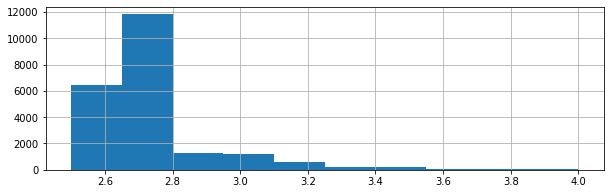

In [93]:
df_good.query('2.5<=ceiling_height<=4')['ceiling_height'].hist(bins=10, figsize=(10,3))

In [94]:
good_ceiling_height = df_good.query('2.5<=ceiling_height<=4')['ceiling_height']
df_good = df_good.query('ceiling_height in @good_ceiling_height')
df_good['ceiling_height'].describe()

count    22130.000000
mean         2.696529
std          0.206751
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

In [95]:
df_good['last_price'].value_counts()

4500.0     320
3500.0     271
4200.0     241
4300.0     238
4000.0     238
          ... 
9555.0       1
5248.0       1
8037.0       1
60309.9      1
11475.0      1
Name: last_price, Length: 2856, dtype: int64

In [96]:
df_good['last_price'].describe()

count     22130.00000
mean       6609.69105
std       10642.78876
min          12.19000
25%        3480.00000
50%        4700.00000
75%        6900.00000
max      763000.00000
Name: last_price, dtype: float64

Цены очень разные, пердположу, что за 12 это аренда, а не продажа

In [97]:
df_good[df_good['last_price'] <= 1000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio
164,6,800.0,40.3,2018-06-25,2,2.65,3.0,NaN,1,False,...,NaN,NaN,81,19851.116625,0,6,2018,первый,NaN,NaN
247,7,650.0,31.0,2017-01-20,1,2.65,3.0,NaN,1,False,...,NaN,NaN,378,20967.741935,4,1,2017,первый,NaN,NaN
259,6,900.0,30.0,2017-11-21,1,2.50,5.0,15.0,4,False,...,NaN,NaN,0,30000.000000,1,11,2017,другой,0.500000,0.166667
268,7,650.0,46.0,2018-03-15,2,2.50,5.0,30.0,5,False,...,NaN,NaN,75,14130.434783,3,3,2018,последний,0.652174,0.152174
293,2,900.0,42.8,2017-06-14,2,2.65,5.0,32.0,5,False,...,NaN,NaN,247,21028.037383,2,6,2017,последний,0.747664,0.116822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23153,9,650.0,41.0,2017-10-13,2,2.65,3.0,28.0,1,False,...,NaN,NaN,14,15853.658537,4,10,2017,первый,0.682927,0.146341
23354,18,900.0,42.6,2018-02-26,2,2.65,2.0,28.0,1,False,...,NaN,NaN,219,21126.760563,0,2,2018,первый,0.657277,0.211268
23484,11,470.0,44.5,2018-07-02,2,2.65,2.0,28.0,2,False,...,NaN,NaN,298,10561.797753,0,7,2018,последний,0.629213,0.168539
23486,7,1000.0,31.1,2018-10-19,1,2.50,5.0,20.0,4,False,...,NaN,NaN,39,32154.340836,4,10,2018,другой,0.643087,0.160772


<AxesSubplot:>

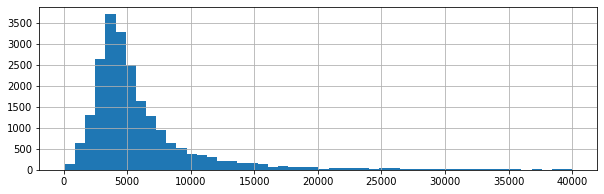

In [98]:
df_good['last_price'].hist(bins=50, range=(100, 40000),figsize=(10,3))

In [99]:
df_good[df_good['last_price'] >= 12000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,0,120370.370370,3,3,2019,другой,0.472222,0.231481
3,0,64900.000,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,3.0,234.0,424,408176.100629,4,7,2015,другой,NaN,NaN
19,16,14200.000,121.0,2019-01-09,3,2.75,16.0,76.0,8,False,...,0.0,NaN,97,117355.371901,2,1,2019,другой,0.628099,0.099174
35,6,15500.000,149.0,2017-06-26,5,2.65,5.0,104.0,4,False,...,1.0,779.0,644,104026.845638,0,6,2017,другой,0.697987,0.114094
42,13,22000.000,161.8,2015-07-08,4,2.80,4.0,81.0,2,False,...,1.0,907.0,987,135970.333745,2,7,2015,другой,0.500618,0.108776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23587,7,12100.000,88.0,2017-07-07,3,2.65,10.0,NaN,5,False,...,2.0,359.0,200,137500.000000,4,7,2017,другой,NaN,0.159091
23590,0,21187.872,123.3,2017-04-25,3,2.65,NaN,50.0,18,False,...,0.0,NaN,104,171840.000000,1,4,2017,None,0.405515,0.191403
23608,22,14000.000,80.0,2017-11-10,3,2.65,11.0,44.0,6,False,...,1.0,232.0,19,175000.000000,4,11,2017,другой,0.550000,0.137500
23631,17,14799.000,104.0,2018-11-18,3,3.10,4.0,66.0,2,False,...,1.0,553.0,90,142298.076923,6,11,2018,другой,0.634615,0.134615


<AxesSubplot:>

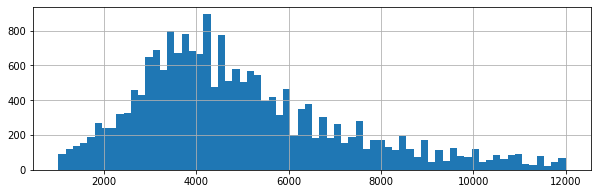

In [100]:
df_good.query('1000<last_price<12000')['last_price'].hist(bins=70, figsize=(10,3))

In [101]:
good_last_price = df_good.query('1000<last_price<12000')['last_price']
df_good = df_good.query('last_price in @good_last_price')
df_good['last_price'].describe()

count    19968.000000
mean      4948.227857
std       2229.718573
min       1010.000000
25%       3400.000000
50%       4500.000000
75%       6100.000000
max      11999.000000
Name: last_price, dtype: float64

In [102]:
df_good.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio
1,7,3350.0,40.4,2018-12-04,1,2.65,11.0,19.0,1,False,...,0.0,NaN,81,82920.792079,1,12,2018,первый,0.470297,0.272277
2,10,5196.0,56.0,2015-08-20,2,2.65,5.0,34.0,4,False,...,2.0,574.0,558,92785.714286,3,8,2015,другой,0.607143,0.148214
4,2,10000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000
5,10,2890.0,30.4,2018-09-10,1,2.65,12.0,14.0,5,False,...,NaN,NaN,55,95065.789474,0,9,2018,другой,0.460526,0.299342
6,6,3700.0,37.3,2017-11-02,1,2.65,26.0,11.0,6,False,...,0.0,NaN,155,99195.710456,3,11,2017,другой,0.294906,0.386059


Предобработка завершена.

Изучим какие факторы больше всего влияют на стоимость квартиры. Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.



In [103]:
df_good.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,living_area_ratio,kitchen_area_ratio
total_images,1.000000,0.150778,0.093839,0.076830,0.013023,0.007065,0.082475,0.030426,0.014212,-0.027352,...,-0.014831,-0.028323,0.004288,-0.073115,0.107946,-0.007378,0.004200,0.155495,0.009258,-0.031515
last_price,0.150778,1.000000,0.709363,0.465038,0.373715,0.162676,0.593417,0.112703,0.022789,-0.074302,...,0.036253,0.148051,-0.053022,0.045664,0.581915,-0.011864,-0.001237,0.003026,0.032158,-0.126808
total_area,0.093839,0.709363,1.000000,0.804090,0.291793,-0.055656,0.913926,-0.050332,0.021314,-0.114324,...,-0.011672,0.101902,-0.034017,0.091078,-0.111975,-0.008764,0.003185,-0.070510,0.243079,-0.421292
rooms,0.076830,0.465038,0.804090,1.000000,0.112305,-0.245095,0.890783,-0.183769,-0.006818,-0.170873,...,-0.055867,0.031772,-0.010451,0.061928,-0.250374,-0.000893,-0.006199,-0.041659,0.560322,-0.654869
ceiling_height,0.013023,0.373715,0.291793,0.112305,1.000000,-0.038298,0.237367,-0.028169,0.059581,0.014081,...,-0.074739,0.168742,-0.084650,0.053612,0.201926,-0.014135,-0.002893,-0.047081,-0.042847,0.049367
floors_total,0.007065,0.162676,-0.055656,-0.245095,-0.038298,1.000000,-0.194633,0.670929,-0.022293,0.073775,...,0.110470,-0.101934,0.026849,-0.022925,0.321961,0.015066,0.016068,0.001525,-0.377629,0.378250
living_area,0.082475,0.593417,0.913926,0.890783,0.237367,-0.194633,1.000000,-0.148368,0.007775,-0.075227,...,-0.048893,0.076195,-0.022242,0.075560,-0.188957,-0.003909,-0.002555,-0.060555,0.591504,-0.624219
floor,0.030426,0.112703,-0.050332,-0.183769,-0.028169,0.670929,-0.148368,1.000000,-0.013615,0.040740,...,0.076531,-0.063797,0.024456,-0.022560,0.236822,0.013888,0.019456,0.001924,-0.270817,0.267808
is_apartment,0.014212,0.022789,0.021314,-0.006818,0.059581,-0.022293,0.007775,-0.013615,1.000000,-0.003369,...,-0.028762,0.003483,0.015855,-0.008869,0.012327,-0.007946,-0.011562,0.025939,-0.000910,0.021349
studio,-0.027352,-0.074302,-0.114324,-0.170873,0.014081,0.073775,-0.075227,0.040740,-0.003369,1.000000,...,0.012935,0.003802,0.003002,-0.018860,0.047949,-0.000103,0.001234,0.016984,0.092685,NaN


In [104]:
df_good['last_price'].corr(df_good['total_area'])

0.7093628068544203

<AxesSubplot:xlabel='total_area'>

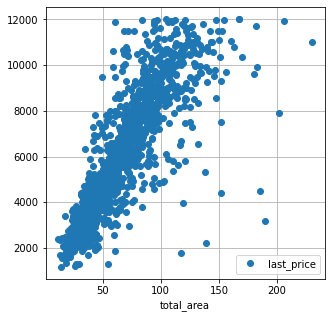

In [105]:
df_good.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))

Чем больше площадь квартиры, тем выше её стоимость.

In [106]:
df_good['last_price'].corr(df_good['rooms'])

0.46503826323031594

<AxesSubplot:xlabel='rooms'>

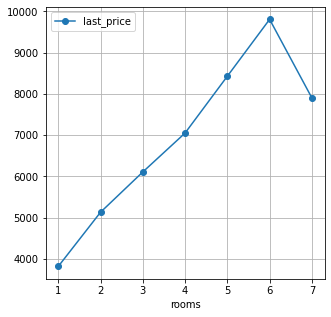

In [107]:
df_good.query('rooms > 0').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

Чем больше комнат, тем выше стоимость. Но, если комнат больше 7, стоимость снижается.


In [108]:
df_good['last_price'].corr(df_good['city_centers_nearest'])

-0.346850123850724

<AxesSubplot:xlabel='city_centers_nearest'>

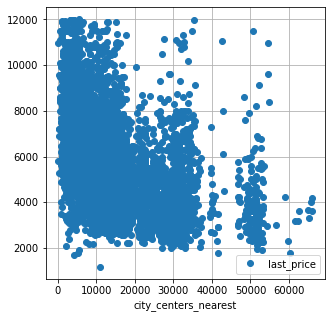

In [109]:
df_good.pivot_table(index='city_centers_nearest', values='last_price').plot(grid=True, style='o', figsize=(5, 5))

в центре расположены почти все дорогие квартиры, но это не значит, что с увеличением расстояния будет уменьшатся цена, в центре также много и дешевых квартир.


<AxesSubplot:xlabel='floor_category'>

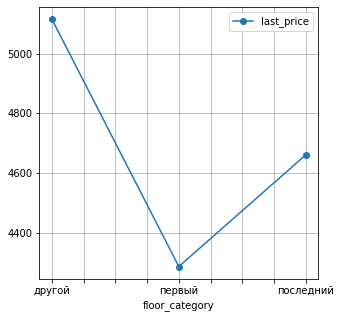

In [110]:
df_good.pivot_table(index='floor_category', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

Первый этаж дешевле, чем любой другой. Последний этаж дороже всего.


Цена практически не коррелирует с днем недели. Больше всего смотрят объявления размещенные в субботу. Скорее всего поскольку в субботу у покупателей есть время смотреть объявления, а у продавцов есть время выкладывать объявления. Обычно новые объявления всплывают первыми для просмотра.

<AxesSubplot:xlabel='weekday_exposition', ylabel='last_price'>

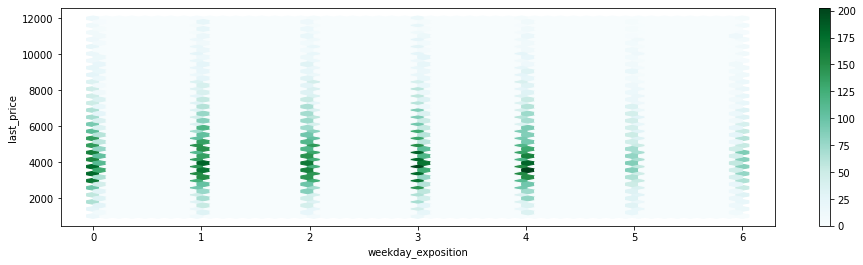

In [111]:
df_good.plot(x='weekday_exposition', y='last_price', kind='hexbin', gridsize=50, sharex=False, figsize=(16,4))

<AxesSubplot:xlabel='month_exposition', ylabel='last_price'>

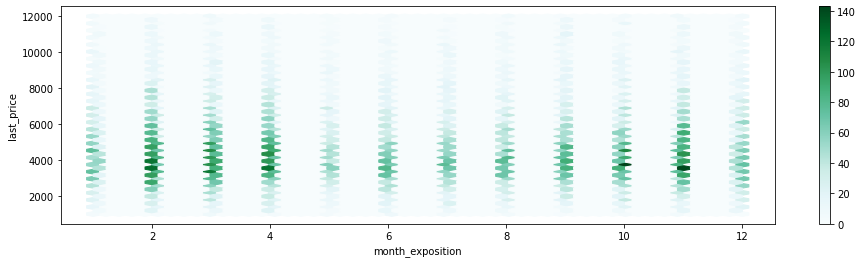

In [112]:
df_good.plot(x='month_exposition', y='last_price', kind='hexbin', gridsize=50, sharex=False, figsize=(16,4))

<AxesSubplot:xlabel='year_exposition', ylabel='last_price'>

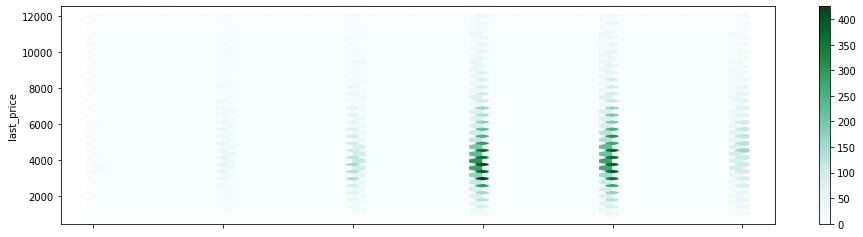

In [113]:
df_good.plot(x='year_exposition', y='last_price', kind='hexbin', gridsize=50, figsize=(16,4))

Стоимость квартиры практически не коррелирует с месяцем продажи. Больше всего смотрят квартир в декабре. Видимо перед Новым годом хотят начать новую жизнь в новой квартире).

Цена практически не коррелирует с месяцем.



Стоимость квартиры практически не коррелирует с годом продажи. Наблюдается обратная корреляция.

Цена НЕ зависит от дня недели, месяца и года размещения объявления (зато количество размешений зависит :)) )

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [114]:
city_top = df['locality_name'].value_counts().head(10)
city_top

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [115]:
city_top_price = df.query('locality_name in (@city_top.index)').pivot_table(values='price_square_meter', index='locality_name')
city_top_price.sort_values('price_square_meter', ascending=False).round()

,price_square_meter
locality_name,
Санкт-Петербург,114849.0
Пушкин,103126.0
деревня Кудрово,92474.0
посёлок Парголово,90176.0
посёлок Мурино,85752.0
посёлок Шушары,78677.0
Колпино,75425.0
Гатчина,68746.0
Всеволожск,68654.0


Самая высокая стоимость квадратного метра в Санкт-Петербурге и составляет 114849.0, а самая низкая в Выборге и составляет 58142.0. 

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Выясним какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

In [116]:
df_good['center'] = df_good['city_centers_nearest'] / 1000

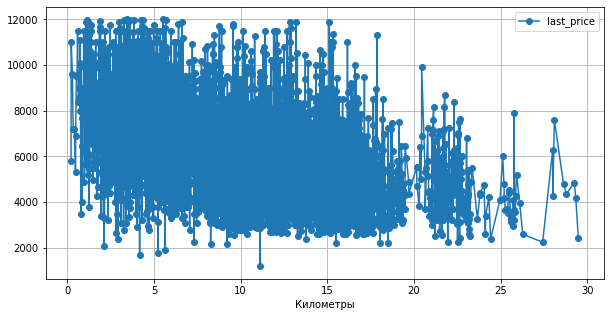

In [117]:
city = df_good.query('locality_name == "Санкт-Петербург"').pivot_table(values='last_price', index='center').plot(grid=True, style='o-', xlabel="Километры", figsize=(10, 5))

График сильно меняется в значении 8 км, поэтому будем считать центральной зоной расстояние радиусом 8 км.

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков.

In [118]:
spb_center = df_good.query('(locality_name == "Санкт-Петербург") & (center <= 8)')

In [119]:
spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().round(2)

,total_area,last_price,rooms,ceiling_height
count,2345.00,2345.00,2345.00,2345.00
mean,67.22,7467.45,2.36,2.88
std,24.83,2225.20,1.05,0.30
min,12.00,1600.00,0.00,2.50
25%,47.90,5800.00,2.00,2.65
50%,64.50,7350.00,2.00,2.74
75%,81.50,9100.00,3.00,3.04
max,206.00,11999.00,6.00,4.00


In [120]:
df_good[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().round(2)

,total_area,last_price,rooms,ceiling_height
count,19968.00,19968.00,19968.00,19968.00
mean,53.69,4948.23,1.94,2.67
std,19.47,2229.72,0.92,0.18
min,12.00,1010.00,0.00,2.50
25%,39.00,3400.00,1.00,2.60
50%,50.00,4500.00,2.00,2.65
75%,64.00,6100.00,3.00,2.70
max,230.00,11999.00,7.00,4.00


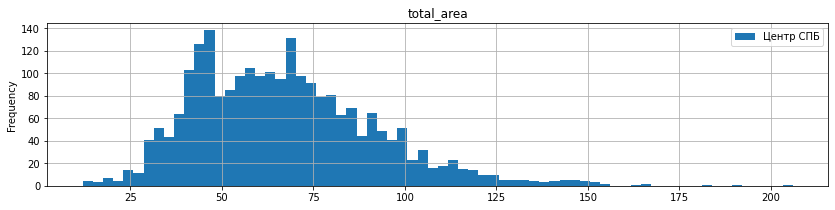

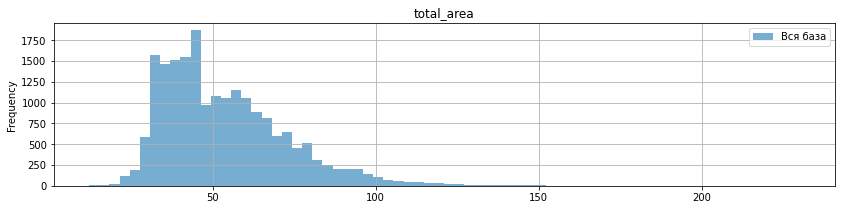

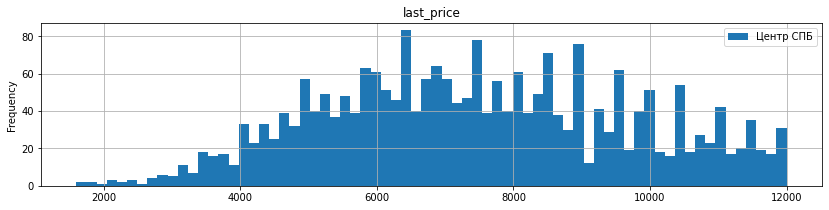

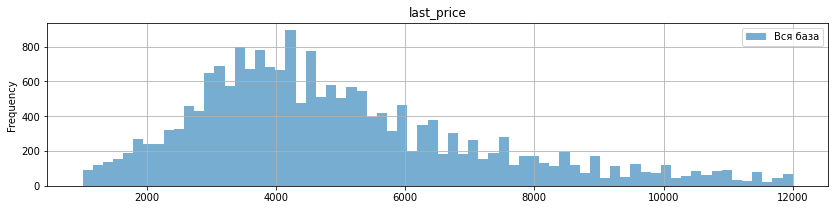

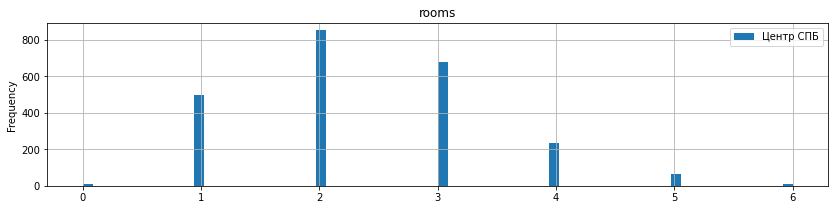

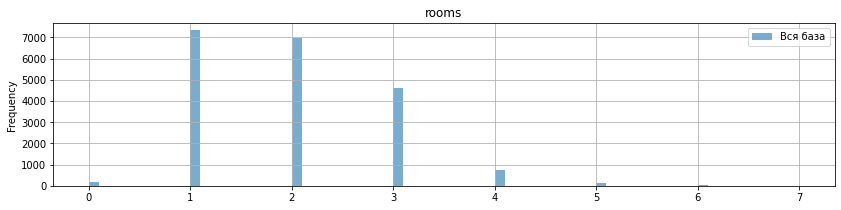

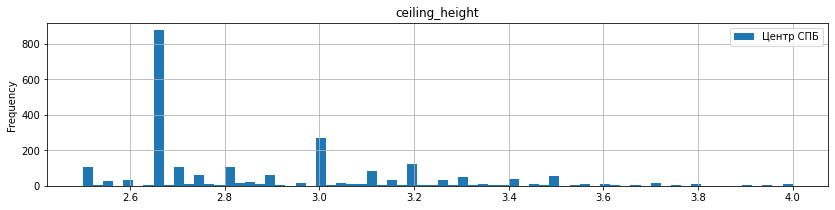

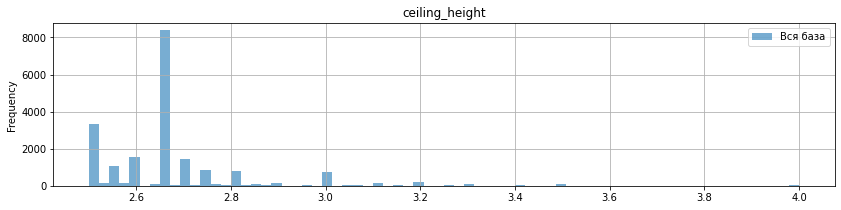

In [121]:
for i in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    spb_center.plot(y=i, kind='hist', grid=True, figsize=(14,3), bins=70, alpha=1, legend=True, label='Центр СПБ')
    plt.title(i)
    df_good.plot(y=i, kind='hist', grid=True, figsize=(14,3), bins=70, alpha=0.6, legend=True, label='Вся база')
    plt.title(i)

Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

<AxesSubplot:>

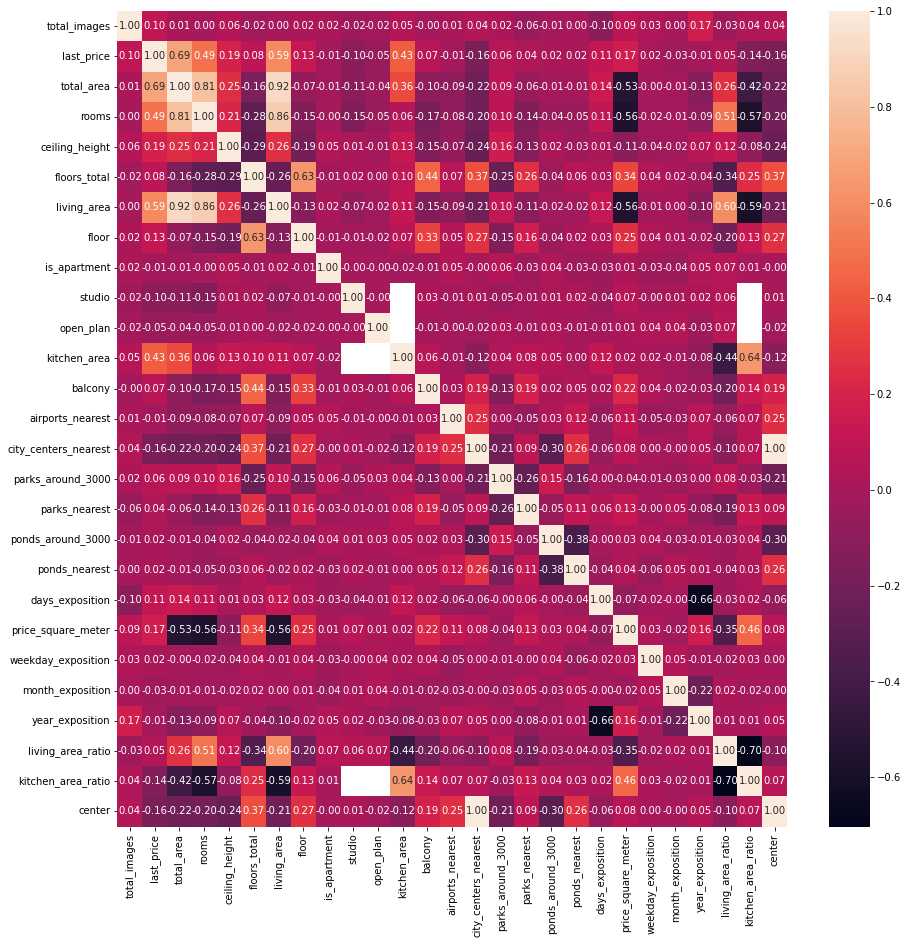

In [122]:
plt.figure(figsize=(15,15))
sns.heatmap(spb_center.corr(), annot=True, fmt='.2f')

<AxesSubplot:>

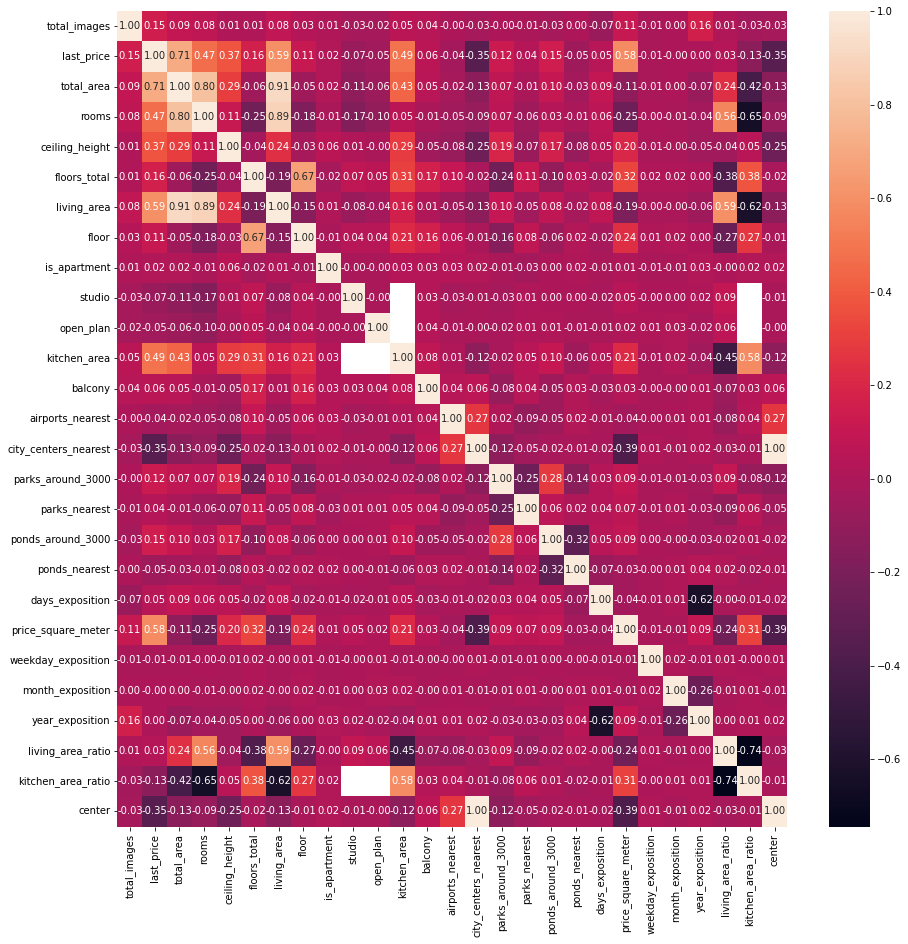

In [123]:
plt.figure(figsize=(15,15))
sns.heatmap(df_good.corr(), annot=True, fmt='.2f')

In [124]:
spb_center[['rooms', 'city_centers_nearest']].describe().round(2)

,rooms,city_centers_nearest
count,2345.00,2345.00
mean,2.36,4783.84
std,1.05,1741.09
min,0.00,208.00
25%,2.00,3653.00
50%,2.00,4844.00
75%,3.00,6017.00
max,6.00,7998.00


In [125]:
df_good[['rooms', 'city_centers_nearest']].describe().round(2)

,rooms,city_centers_nearest
count,19968.00,15245.00
mean,1.94,14893.78
std,0.92,8529.28
min,0.00,208.00
25%,1.00,10574.00
50%,2.00,13558.00
75%,3.00,16655.00
max,7.00,65968.00


In [126]:
spb_center['floor_category'].value_counts()

другой       1620
последний     400
первый        323
Name: floor_category, dtype: int64

In [127]:
df_good['floor_category'].value_counts()

другой       14644
последний     2720
первый        2532
Name: floor_category, dtype: int64

In [128]:
spb_center['first_day_exposition'].value_counts().sort_values()

2017-01-27     1
2017-03-20     1
2017-05-13     1
2018-04-18     1
2018-12-14     1
              ..
2018-03-15    14
2017-10-03    15
2017-06-29    16
2017-11-10    19
2018-02-01    32
Name: first_day_exposition, Length: 936, dtype: int64

In [129]:
df_good['first_day_exposition'].value_counts().sort_values()

2015-07-19      1
2014-12-29      1
2015-08-07      1
2015-11-28      1
2015-04-02      1
             ... 
2018-03-26     84
2017-09-27     84
2017-10-13    105
2017-11-10    201
2018-02-01    320
Name: first_day_exposition, Length: 1478, dtype: int64

<AxesSubplot:xlabel='rooms'>

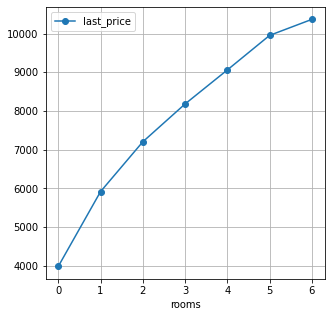

In [130]:
spb_center.query('rooms <= 9').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

<div class="alert alert-info"> <b> </b> Чем больше комнат, тем выше стоимость. Но, если комнат больше 8, стоимость снижается.
</div> 

<AxesSubplot:xlabel='rooms'>

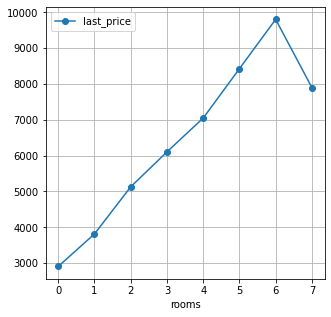

In [131]:
df_good.query('rooms <= 9').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

<AxesSubplot:xlabel='floor_category'>

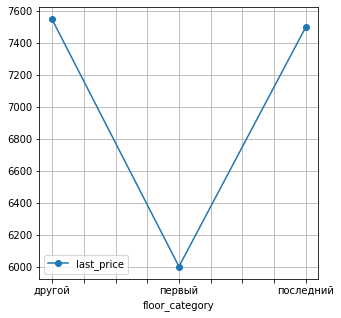

In [132]:
spb_center.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))

<AxesSubplot:xlabel='floor_category'>

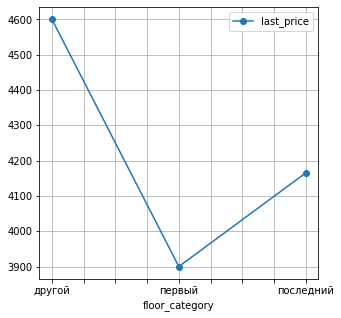

In [133]:
df_good.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))

<AxesSubplot:xlabel='total_area'>

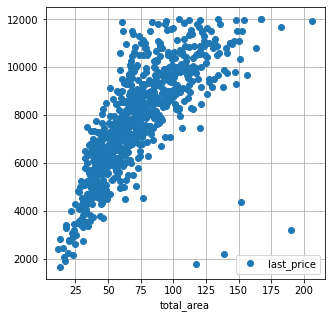

In [134]:
spb_center.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))

In [135]:
spb_center_meter = spb_center['last_price'] / spb_center['total_area']
spb_center_meter.describe().round()

count    2345.0
mean      117.0
std        30.0
min        15.0
25%        95.0
50%       113.0
75%       135.0
max       292.0
dtype: float64

В центре Санкт-Петербурга такие же законы как и во всей выборке. Чем больше площадь квартиры, тем выше стоимость. Средняя стоимость квадратного метра составляет 140974.0 тыс.рублей.

<AxesSubplot:xlabel='ceiling_height'>

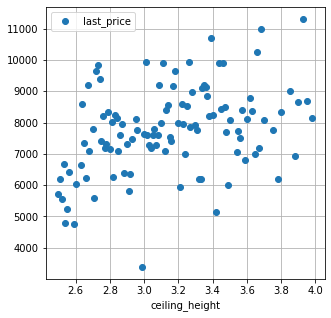

In [136]:
spb_center.query('ceiling_height < 4').pivot_table(index='ceiling_height', values='last_price').plot(grid=True, style='o', figsize=(5, 5))

Стоимость квартиры с высоким потолком намного выше, эта закономерность верна и для всей выборки.

In [137]:
print('Площадь квартиры в Санкт-Петербурге (медиана):', round(df.query('locality_name == "Санкт-Петербург"')['total_area'].median()))
print('Площадь квартиры в Санкт-Петербурге (средняя):', round(df.query('locality_name == "Санкт-Петербург"')['total_area'].mean()))

Площадь квартиры в Санкт-Петербурге (медиана): 55
Площадь квартиры в Санкт-Петербурге (средняя): 65


In [138]:
print('Площадь квартиры в центре Санкт-Петербурга (медиана):', round(spb_center['total_area'].median()))
print('Площадь квартиры в центре Санкт_Петербурга (средняя):', round(spb_center['total_area'].mean()))

Площадь квартиры в центре Санкт-Петербурга (медиана): 64
Площадь квартиры в центре Санкт_Петербурга (средняя): 67


<AxesSubplot:>

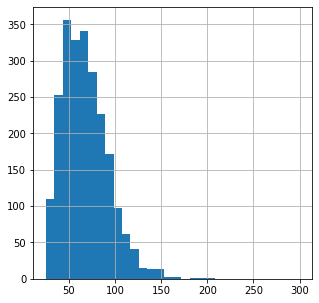

In [139]:
spb_center['total_area'].hist(bins=30, range=(25,300), figsize=(5,5))

<AxesSubplot:>

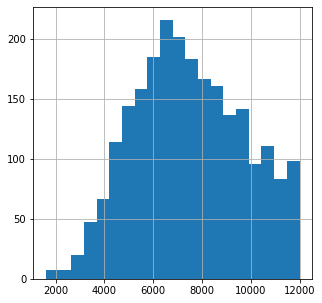

In [140]:
spb_center['last_price'].hist(bins=20, figsize=(5,5))

In [141]:
print('Высота потолков в Санкт-Петербурге (медиана):', df.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median())
print('Высота потолков в центре Санкт-Петербурга (медиана):', spb_center['ceiling_height'].median())
print('Высота потолков в Санкт-Петербурге (среднее):', round(df.query('locality_name == "Санкт-Петербург"')['ceiling_height'].mean()))
print('Высота потолков в центре Санкт-Петербурга (среднее):', round(spb_center['ceiling_height'].mean()))

Высота потолков в Санкт-Петербурге (медиана): 2.65
Высота потолков в центре Санкт-Петербурга (медиана): 2.74
Высота потолков в Санкт-Петербурге (среднее): 3
Высота потолков в центре Санкт-Петербурга (среднее): 3


<AxesSubplot:xlabel='rooms'>

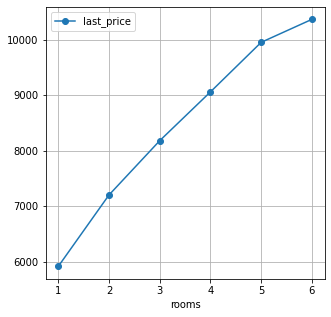

In [142]:
spb_center.query('(rooms > 0) & (rooms < 9)').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

In [143]:
spb_center.query('(rooms > 0) & (rooms < 9)').pivot_table(index='floor_category', values=['rooms', 'last_price']).corr()

,last_price,rooms
last_price,1.000000,0.672558
rooms,0.672558,1.000000


<AxesSubplot:xlabel='city_centers_nearest'>

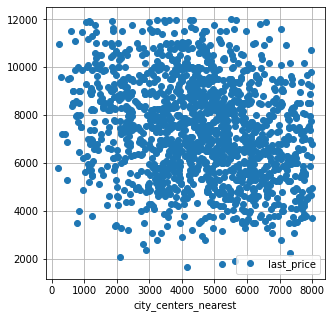

In [144]:
spb_center.pivot_table(index='city_centers_nearest', values='last_price', aggfunc='median').plot(grid=True, style='o', figsize=(5, 5))

In [145]:
spb_center.pivot_table(index='floor', values=['city_centers_nearest', 'last_price']).corr()

,city_centers_nearest,last_price
city_centers_nearest,1.000000,0.373902
last_price,0.373902,1.000000


<AxesSubplot:xlabel='weekday_exposition'>

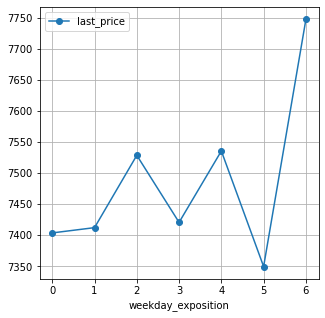

In [146]:
spb_center.pivot_table(index='weekday_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

<AxesSubplot:xlabel='month_exposition'>

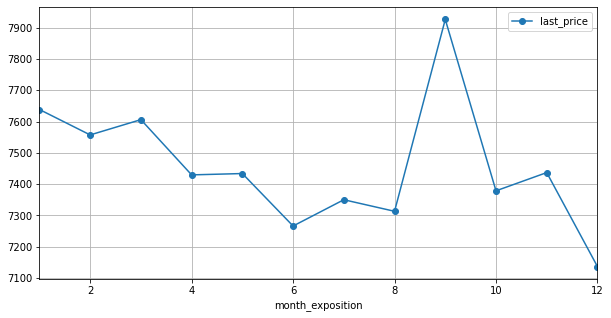

In [147]:
spb_center.pivot_table(index='month_exposition', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))

<AxesSubplot:xlabel='year_exposition'>

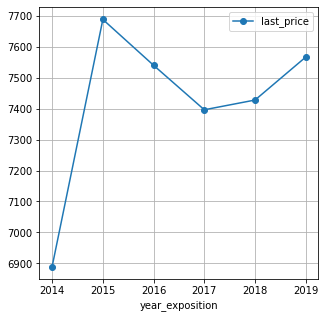

In [148]:
spb_center.pivot_table(index='year_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

<AxesSubplot:>

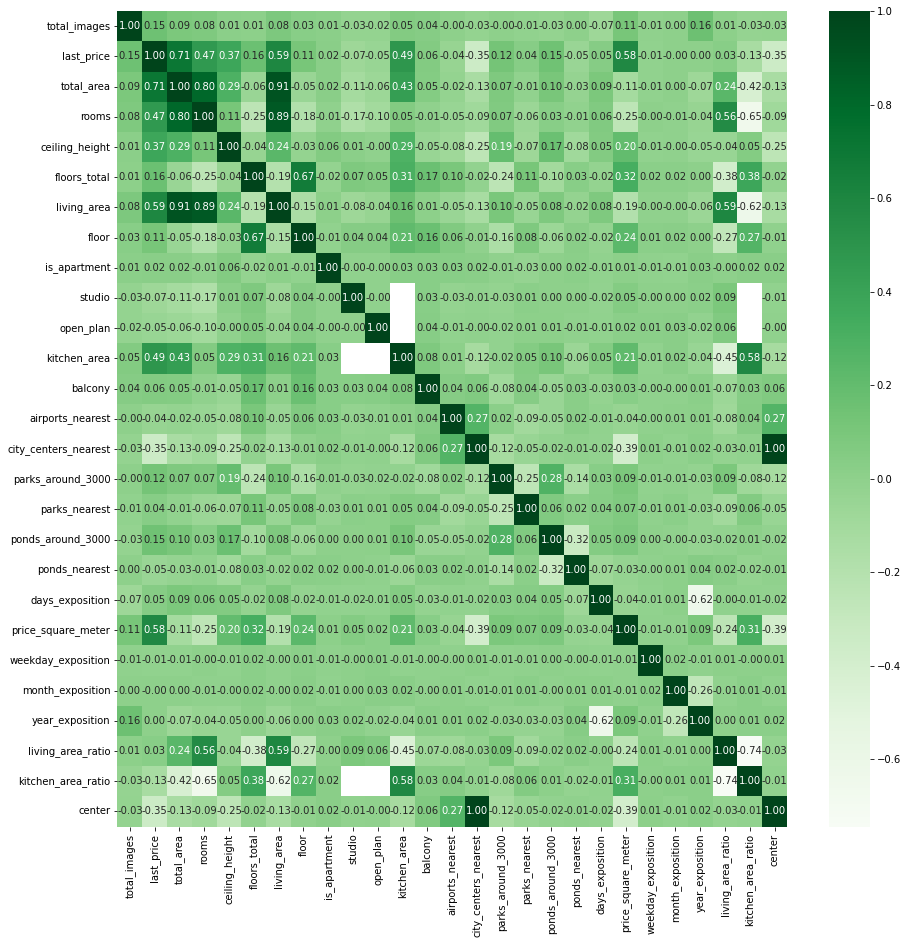

In [149]:
plt.figure(figsize=(15,15))
sns.heatmap(df_good.corr(), annot=True, cmap="Greens", fmt='.2f')

Цена на квартиру зависит от цены за квадратный метр (практически очевидно), от общей площади квартиры (чем больше площадь, тем выше цена), от площади жилой площади и площади кухни, а также от количества комнат. Небольшое влияние оказывает присутствие парков/водоемов рядом.

Также влияние оказывает удаленность от центра - чем дальше от центра, тем ниже цена. Ожидаемо. Таким же образом небольшое влияние оказывает удаленность от аэропорта.

Многие из этих параметров оказывают довольно слабое влияние, но если попробовать их объединить в одну группу, то, наверняка, можно будет построить хорошую предсказательную модель.

Наблюдения.	

Чем больше площадь квартиры, тем выше цена	Чем больше цена за квадратный метр, тем выше цена	Чем выше доля жилой площади/площадь кухни, тем выше цена.

Чем больше комнат, тем выше цена	На первом этаже квартира дешевле, чем на остальных; на последнем дороже, чем на первом, но дешевле чем на остальных	Чем ближе к центру, тем дороже квартира. В самом центре (< 1 км до центра) квартиры стоят на порядок дороже, чем на более удаленных.	

Квартиры, размещенные к продаже в будние дни, в среднем дороже, чем размещенные в выходные.	Квартиры, размещенные к продаже в летние месяцы и в октябре, в среднем дешевле, чем размещенные в любые другие месяца. 

В начале и в конце года цены стабильные и высокие.	Квартиры, размещенные к продаже в 2014 году, дороже всех. Период 2015-2018 - период низких цен на квартиры (кризис), 2019 - рецессия экономики, цены пошли вверх впервые после наступления кризиса.


### Вывод

<div class="alert alert-info"> <b> </b> 
    
- Зависимость стоимости квартиры от площади такая же, как и в целом по городу.
    
- Зависимость стоимости квартиры от числа комнат в центре Санкт_Петербурга такая же, как и в целом по городу.
    
- Стоимости квартиры зависит от высоты потолков, чем выше потолок, тем выше стоимость квартиры.
    
- В центре Санкт-Петербурга верхний этаж стоит практически столько же, сколько и другие этажи, кроме первого.
    
- В центре Санкт-Петербурга почти нет зависимости от удалённости от центра города. 
    
- Больше всего смотрят квартир в субботу и декабре (перед Новым годом видимо)
    
    
    
Выводы по квартирам в центре Санкт-Петербурга практически не отличаются от общих выводов.
    
    
</div> 

Данные изучены, произведена предобработка данных.
    
- Чаще всего продажа квартиры занимает от 112 до 193 дней. Самая быстрая продажа 1 день, самая долгая - 1580 дней. Продажу в срок до 43 дня можно считать быстрой, а продажу дольше 256 дней можно считать необычно долгой.
- На стоимость квартиры влияет площадь, количество комнат и высота потолков. Чем больше площадь, чем больше комнат, чем выше потолки, тем выше стоимость.
- Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже выше, чем на остальных, кроме первого.
- Самая высокая стоимость квадратного метра в Санкт-Петербурге составляет 114849.0, а самая низкая в Выборге и составляет 58142.0.
- В центре Санкт-Петербурга практически нет разницы, насколько квартира удалена от центра города, чего нельзя сказать о всей выборке.
- В центре Санкт-Петербурга последний этаж практически не влияет на стоимость квартиры, в отличие от остального города.


## Отчет по проекту

Мы обработали полученный архив данных - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы. 

Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. 

Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. 

Были определены аномалии в данных параметрах. Изучая время продажи квартир мы выявили, что большое количество объявлений было автоматически снято с Яндекс Недвижимость и дату из снятия нельзя считать датой продажи квартиры, поэтому, изучая средние сроки продажи квартир - данные значения не учитывались. 

Мы выявили при помощи диаграммы размаха, что нормальные значения продажи квартир варьируются от 1 до 600 дней. 

Мы выявили, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. 

Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь. Нужно учитывать, что в 2016-2017 годах стоимость квартир в среднем по рынку была ниже на 10-20 %, тогда как в центре Санкт-Петербурга данной зависимости от года не обнаружено. В данном случае имело место постоянное удорожание стоимости, начиная с 2015 года по текущий момент. Судя, по резкости изменения цен в зависимости от удаления от центра СПБ, мы выявили центр города в радиусе 3 километров.

Также важно учитывать, что, рассматривая среднюю стоимость квартир в 2014-2019 годах, мы не делали сегментацию рынка, а лишь смотрели средние показатели по рынку в целом. Т.е. возможно, что цены на аналогичные квартиры в разных годах вели себя абсолютно по-разному. Т.е. например в то время, когда средняя стоимость метра по рынку в 2016-2017 годах была наиболее низкой, какие-то аналогичные прошлым годам квартиры могли и не падать в цене, а наоборот дорожать! 

Именно об этом нам и говорят данные, полученные при изучении единственного сегмента квартир - находящихся в радиусе 3 км в центре СПБ.